<a href="https://colab.research.google.com/github/iamX55/mL-project/blob/main/fashion_convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
(X_train,y_train),(X_test,y_test) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
X_test.shape

(10000, 28, 28)

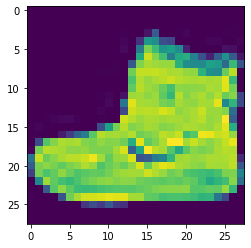

In [ ]:
plt.imshow(X_train[0])

In [ ]:
X_train=np.expand_dims(X_train,-1)
X_test=np.expand_dims(X_test,-1)

#Scalling

In [ ]:
X_train=X_train/255;
X_test=X_test/255;

In [ ]:
y_train[0]

9

#Split Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=2020)

In [ ]:
model = keras.models.Sequential([
            keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation='relu',input_shape=[28,28,1]),
            keras.layers.MaxPooling2D(pool_size=(2,2)),
            keras.layers.Flatten(),
            keras.layers.Dense(units=128,activation='relu'),
            keras.layers.Dense(units=10, activation='softmax')


])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [ ]:
model.compile(
      optimizer='adam',
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy']
)

In [ ]:
model.fit(X_train,y_train,epochs=10, batch_size=512,verbose=1,validation_data=(X_val,y_val))

Epoch 1/10
94/94 [==============================] - 13s 11ms/step - loss: 0.6231 - accuracy: 0.7878 - val_loss: 0.4253 - val_accuracy: 0.8526
Epoch 2/10
94/94 [==============================] - 1s 8ms/step - loss: 0.3714 - accuracy: 0.8709 - val_loss: 0.3565 - val_accuracy: 0.8757
Epoch 3/10
94/94 [==============================] - 1s 8ms/step - loss: 0.3244 - accuracy: 0.8872 - val_loss: 0.3302 - val_accuracy: 0.8866
Epoch 4/10
94/94 [==============================] - 1s 9ms/step - loss: 0.2956 - accuracy: 0.8965 - val_loss: 0.3191 - val_accuracy: 0.8883
Epoch 5/10
94/94 [==============================] - 1s 9ms/step - loss: 0.2727 - accuracy: 0.9044 - val_loss: 0.2967 - val_accuracy: 0.8967
Epoch 6/10
94/94 [==============================] - 1s 9ms/step - loss: 0.2585 - accuracy: 0.9088 - val_loss: 0.2867 - val_accuracy: 0.8989
Epoch 7/10
94/94 [==============================] - 1s 8ms/step - loss: 0.2435 - accuracy: 0.9130 - val_loss: 0.2787 - val_accuracy: 0.9006
Epoch 8/10
94/94 [

#Model Predict

In [ ]:
model.predict(np.expand_dims(X_test[0],axis=0)).round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.98]],
      dtype=float32)

In [ ]:
np.argmax(model.predict(np.expand_dims(X_test[0],axis=0)).round(2))

9

In [ ]:
y_test[0]

9

In [ ]:
y_pred=model.predict(X_test).round(2)

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2683 - accuracy: 0.9023


[0.2682804763317108, 0.9023000001907349]

#confusion Matrix

In [ ]:
class_labels=["T-shirt/top","Trouser","pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

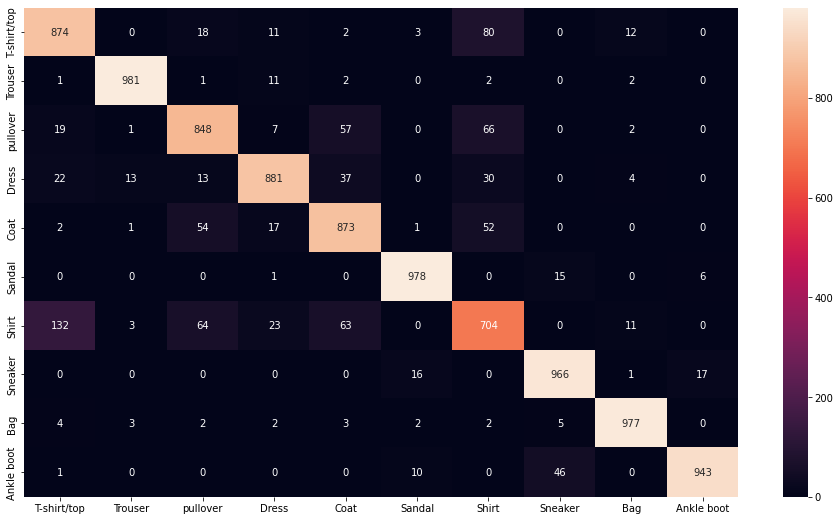

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels = [np.argmax(label) for label in y_pred]
cm = confusion_matrix(y_test,y_pred_labels)
sns.heatmap(cm,annot=True, fmt='d',xticklabels=class_labels,yticklabels=class_labels)

In [ ]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_pred_labels,target_names=class_labels)
print(cr)


              precision    recall  f1-score   support

 T-shirt/top       0.83      0.87      0.85      1000
     Trouser       0.98      0.98      0.98      1000
    pullover       0.85      0.85      0.85      1000
       Dress       0.92      0.88      0.90      1000
        Coat       0.84      0.87      0.86      1000
      Sandal       0.97      0.98      0.97      1000
       Shirt       0.75      0.70      0.73      1000
     Sneaker       0.94      0.97      0.95      1000
         Bag       0.97      0.98      0.97      1000
  Ankle boot       0.98      0.94      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



#Convolutional Nueral Network

In [ ]:
model2 = keras.models.Sequential([
        keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation='relu',input_shape=[28,28,1]),
        keras.layers.MaxPooling2D(pool_size=(2,2)),
        keras.layers.Conv2D(filters=64, kernel_size=3 , strides=(2,2) ,padding='same', activation='relu'),
        keras.layers.MaxPooling2D( pool_size=(2,2)),
        keras.layers.Flatten(),
        keras.layers.Dense(units=128, activation='relu'),
        keras.layers.Dropout(0.25),
        keras.layers.Dense(units=256, activation='relu'),
        keras.layers.Dropout(0.25),
        keras.layers.Dense(units=128, activation='relu'),
        keras.layers.Dense(units=10, activation='softmax')

])

In [ ]:
model2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model2.fit(X_train,y_train,epochs=50, batch_size=512,verbose=1,validation_data=(X_val,y_val))

Epoch 1/50
94/94 [==============================] - 13s 16ms/step - loss: 1.0546 - accuracy: 0.6095 - val_loss: 0.5789 - val_accuracy: 0.7715
Epoch 2/50
94/94 [==============================] - 1s 11ms/step - loss: 0.5476 - accuracy: 0.7919 - val_loss: 0.4538 - val_accuracy: 0.8307
Epoch 3/50
94/94 [==============================] - 1s 11ms/step - loss: 0.4476 - accuracy: 0.8349 - val_loss: 0.3892 - val_accuracy: 0.8547
Epoch 4/50
94/94 [==============================] - 1s 11ms/step - loss: 0.3919 - accuracy: 0.8566 - val_loss: 0.3505 - val_accuracy: 0.8695
Epoch 5/50
94/94 [==============================] - 1s 11ms/step - loss: 0.3543 - accuracy: 0.8703 - val_loss: 0.3312 - val_accuracy: 0.8770
Epoch 6/50
94/94 [==============================] - 1s 11ms/step - loss: 0.3289 - accuracy: 0.8790 - val_loss: 0.3205 - val_accuracy: 0.8820
Epoch 7/50
94/94 [==============================] - 1s 10ms/step - loss: 0.3115 - accuracy: 0.8845 - val_loss: 0.3116 - val_accuracy: 0.8849
Epoch 8/50
9

In [ ]:
model2.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3765 - accuracy: 0.9052


[0.3765174448490143, 0.9052000045776367]